In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [12]:
df = pd.read_csv("powerconsumption.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")
df

First Five Rows  

           Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  01-01-2017 00:00        6.559      73.8      0.083                0.051   
1  01-01-2017 00:10        6.414      74.5      0.083                0.070   
2  01-01-2017 00:20        6.313      74.5      0.080                0.062   
3  01-01-2017 00:30        6.121      75.0      0.083                0.091   
4  01-01-2017 00:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption  
0         0.119       34055.69620  
1         0.085       29814.68354  
2         0.100       29128.10127  
3         0.096       28228.86076  
4         0.085       27335.69620   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime             52416 non-null  object 
 1   Tem

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...,...
52411,12-30-2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,12-30-2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,12-30-2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,12-30-2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490


In [13]:
df.shape

(52416, 7)

In [14]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean or median
# For numerical columns
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)
df['DiffuseFlows'].fillna(df['DiffuseFlows'].mean(), inplace=True)

# For categorical columns (if any)
# df['CategoricalColumn'].fillna(df['CategoricalColumn'].mode()[0], inplace=True)

# Check if there are still missing values
print(df.isnull().sum())

Datetime               0
Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64
Datetime               0
Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64


C:\Users\91798\AppData\Local\Temp\ipykernel_6496\2292226797.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
C:\Users\91798\AppData\Local\Temp\ipykernel_6496\2292226797.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [15]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,1,2017,2017-01-01,00:00:00,52,Sunday
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,1,2017,2017-01-01,00:10:00,52,Sunday
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,1,2017,2017-01-01,00:20:00,52,Sunday
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,1,2017,2017-01-01,00:30:00,52,Sunday
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,1,2017,2017-01-01,00:40:00,52,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,12,2017,2017-12-30,23:10:00,52,Saturday
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,12,2017,2017-12-30,23:20:00,52,Saturday
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,12,2017,2017-12-30,23:30:00,52,Saturday


In [16]:

# Perform one-hot encoding on the 'Day' column
dataset = pd.get_dummies(dataset, columns=['Day'])

# Print the updated dataframe
print(dataset.head())


                     Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                                     
2017-01-01 00:00:00        6.559      73.8      0.083                0.051   
2017-01-01 00:10:00        6.414      74.5      0.083                0.070   
2017-01-01 00:20:00        6.313      74.5      0.080                0.062   
2017-01-01 00:30:00        6.121      75.0      0.083                0.091   
2017-01-01 00:40:00        5.921      75.7      0.081                0.048   

                     DiffuseFlows  PowerConsumption  Month  Year        Date  \
Datetime                                                                       
2017-01-01 00:00:00         0.119       34055.69620      1  2017  2017-01-01   
2017-01-01 00:10:00         0.085       29814.68354      1  2017  2017-01-01   
2017-01-01 00:20:00         0.100       29128.10127      1  2017  2017-01-01   
2017-01-01 00:30:00         0.096       28228.86076  

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Define features and target variable
X = dataset[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows','Month',
        'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']]
y = dataset['PowerConsumption']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize base models
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Train base models
xgb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Stack predictions
stacked_pred = np.column_stack((xgb_pred, rf_pred))

# Initialize meta-model (XGBoost)
meta_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train meta-model on stacked predictions
meta_model.fit(stacked_pred, y_test)

# Make predictions using base models
xgb_pred_train = xgb_model.predict(X_train_scaled)
rf_pred_train = rf_model.predict(X_train_scaled)

# Stack training predictions
stacked_pred_train = np.column_stack((xgb_pred_train, rf_pred_train))

# Make predictions on training set using meta-model
meta_pred_train = meta_model.predict(stacked_pred_train)

# Calculate R-squared on training set
r2_train = r2_score(y_train, meta_pred_train)
print("R-squared on training set:", r2_train)

# Make predictions on test set using meta-model
meta_pred_test = meta_model.predict(stacked_pred)

# Calculate R-squared on test set
r2_test = r2_score(y_test, meta_pred_test)
print("R-squared on test set:", r2_test)


R-squared on training set: 0.9558030675834259
R-squared on test set: 0.8927171397109858


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, meta_pred_test))
print("Root Mean Squared Error (RMSE) on test set:", rmse)

# Calculate MSE
mse = mean_squared_error(y_test, meta_pred_test)
print("Mean Squared Error (MSE) on test set:", mse)

# Calculate MAE
mae = mean_absolute_error(y_test, meta_pred_test)
print("Mean Absolute Error (MAE) on test set:", mae)


Root Mean Squared Error (RMSE) on test set: 2327.484092779114
Mean Squared Error (MSE) on test set: 5417182.202139814
Mean Absolute Error (MAE) on test set: 1519.0478424931443


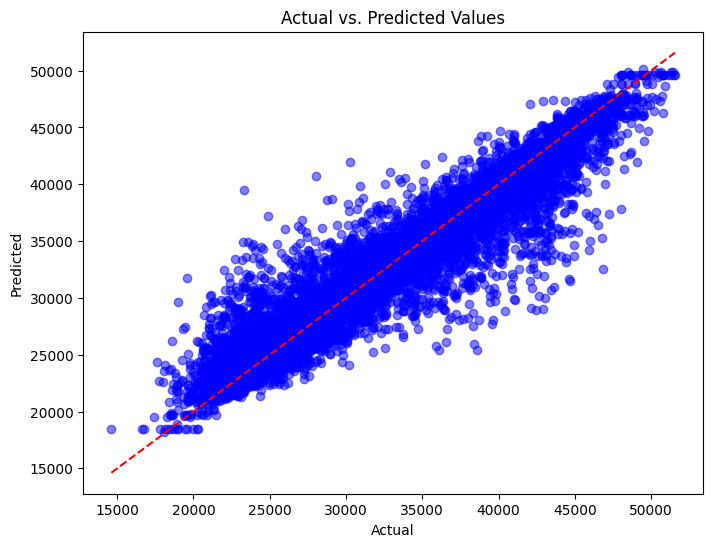

In [19]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, meta_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


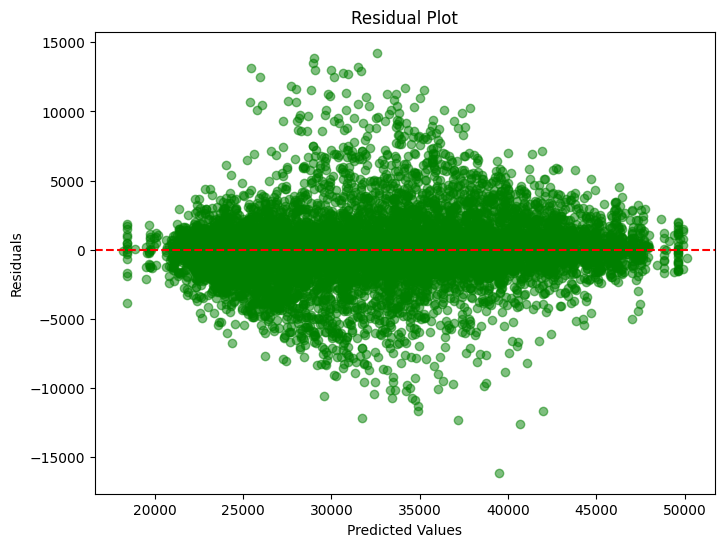

In [20]:
# Calculate residuals
residuals = y_test - meta_pred_test

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(meta_pred_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



In [21]:
# !pip install streamlit 
# !pip install statsmodels


In [24]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from datetime import datetime

# Define features for the VAR model
var_features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']
var_data = dataset[var_features]

train_size = int(len(var_data) * 0.8)
var_train = var_data[:train_size]

# Train the VAR model
var_model = VAR(var_train)
var_model_fitted = var_model.fit(maxlags=15)

# Function to predict future values using VAR model
def predict_var(var_model_fitted, steps):
    lag_order = var_model_fitted.k_ar
    var_pred = var_model_fitted.forecast(var_data.values[-lag_order:], steps=steps)
    return var_pred

# Function to create static features for future dates
def create_static_features(future_dates):
    static_features_list = []
    for date in future_dates:
        month = date.month
        day_of_week = date.dayofweek
        static_features = [
            month,
            1 if day_of_week == 4 else 0,  # Friday
            1 if day_of_week == 0 else 0,  # Monday
            1 if day_of_week == 5 else 0,  # Saturday
            1 if day_of_week == 6 else 0,  # Sunday
            1 if day_of_week == 3 else 0,  # Thursday
            1 if day_of_week == 1 else 0,  # Tuesday
            1 if day_of_week == 2 else 0,  # Wednesday
        ]
        static_features_list.append(static_features)
    return pd.DataFrame(static_features_list, index=future_dates, columns=[
        'Month', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'
    ])

# Function to predict power consumption for a given date
def predict_power_consumption(date, var_model_fitted, scaler, xgb_model, rf_model, meta_model):
    future_date = pd.to_datetime(date)
    
    # Ensure the date is in the future
    if future_date <= dataset.index[-1]:
        raise ValueError("The date must be in the future.")
    
    # Calculate the number of steps to predict
    steps = (future_date - dataset.index[-1]).days
    
    # Predict future values using VAR
    var_forecast = predict_var(var_model_fitted, steps=steps)
    future_dates = pd.date_range(start=dataset.index[-1], periods=steps + 1, freq='D')[1:]
    
    # Create DataFrame for VAR predictions
    var_forecast_df = pd.DataFrame(var_forecast, index=future_dates, columns=var_features)
    
    # Create static features for future dates
    future_static_df = create_static_features(future_dates)
    
    # Combine VAR predictions and static features
    future_data = pd.concat([var_forecast_df, future_static_df], axis=1)
    
    # Standardize future data using the scaler fitted on the training data
    X_future_scaled = scaler.transform(future_data)
    
    # Predict power consumption using base models
    xgb_pred_future = xgb_model.predict(X_future_scaled)
    rf_pred_future = rf_model.predict(X_future_scaled)
    
    # Stack predictions
    stacked_pred_future = np.column_stack((xgb_pred_future, rf_pred_future))
    
    # Predict power consumption using meta-model
    meta_pred_future = meta_model.predict(stacked_pred_future)
    
    # Return the prediction for the requested date
    return meta_pred_future[-1]

# Take the date as input from the user
future_date = input("Enter the future date (YYYY-MM-DD): ")

# Predict power consumption for the input date
try:
    predicted_power_consumption = predict_power_consumption(future_date, var_model_fitted, scaler, xgb_model, rf_model, meta_model)
    print(f"Predicted power consumption for {future_date}: {predicted_power_consumption}")
except ValueError as e:
    print(e)

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Predicted power consumption for 2018-11-25: 28364.029296875
